<a href="https://colab.research.google.com/github/vincentjunitio00/Digit-Recognition/blob/master/digit_with_regularization_dense_vs_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

np.random.seed(42)

train = pd.read_csv('https://raw.githubusercontent.com/vincentjunitio00/Digit-Recognition/master/dataset/train.csv')
print(train)

       label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0          1       0       0       0  ...         0         0         0         0
1          0       0       0       0  ...         0         0         0         0
2          1       0       0       0  ...         0         0         0         0
3          4       0       0       0  ...         0         0         0         0
4          0       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
41995      0       0       0       0  ...         0         0         0         0
41996      1       0       0       0  ...         0         0         0         0
41997      7       0       0       0  ...         0         0         0         0
41998      6       0       0       0  ...         0         0         0         0
41999      9       0       0       0  ...         0         0         0         0

[42000 rows x 7

In [5]:
from sklearn.model_selection import train_test_split

train_set, valid_set = train_test_split(train, test_size = 0.1, random_state=42)
print(train_set)

       label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
22460      8       0       0       0  ...         0         0         0         0
20828      5       0       0       0  ...         0         0         0         0
32032      6       0       0       0  ...         0         0         0         0
6194       2       0       0       0  ...         0         0         0         0
12768      2       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
6265       9       0       0       0  ...         0         0         0         0
11284      9       0       0       0  ...         0         0         0         0
38158      2       0       0       0  ...         0         0         0         0
860        6       0       0       0  ...         0         0         0         0
15795      0       0       0       0  ...         0         0         0         0

[37800 rows x 7

In [6]:
X_train_set = train_set.drop('label', axis=1)
y_train_set = train_set['label']

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_set_normalized = scaler.fit_transform(X_train_set)

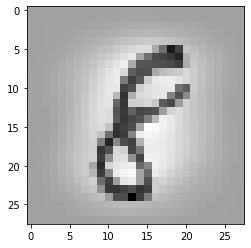

In [8]:
import matplotlib.pyplot as plt

plt.imshow(X_train_set_normalized[0].reshape(28, 28), cmap='binary')

In [9]:
X_valid_set = valid_set.drop('label', axis=1)
y_valid_set = valid_set['label']

X_valid_set_normalized = scaler.transform(X_valid_set)

In [10]:
from keras.layers import Dense, Dropout, Softmax
from keras.models import Sequential
from keras import regularizers

In [11]:
model = Sequential()
model.add(Dense(256, input_shape = (784, ), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-3)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-3)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-3)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-3)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-3)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-3)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-3)))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6

In [13]:
# print(model.layers[2].get_weights())

# print(model.layers[2].get_weights()[0].shape)

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_set_normalized, y_train_set, epochs=100, steps_per_epoch = 32, validation_data = (X_valid_set_normalized, y_valid_set), verbose=1)

Epoch 1/100
32/32 [==============================] - 3s 31ms/step - loss: 4.0614 - accuracy: 0.2135 - val_loss: 2.4310 - val_accuracy: 0.6514
Epoch 2/100
32/32 [==============================] - 0s 16ms/step - loss: 2.3419 - accuracy: 0.7025 - val_loss: 1.6519 - val_accuracy: 0.9043
Epoch 3/100
32/32 [==============================] - 1s 16ms/step - loss: 1.6573 - accuracy: 0.8855 - val_loss: 1.3500 - val_accuracy: 0.9340
Epoch 4/100
32/32 [==============================] - 0s 15ms/step - loss: 1.3523 - accuracy: 0.9208 - val_loss: 1.1492 - val_accuracy: 0.9433
Epoch 5/100
32/32 [==============================] - 0s 15ms/step - loss: 1.1487 - accuracy: 0.9363 - val_loss: 1.0005 - val_accuracy: 0.9519
Epoch 6/100
32/32 [==============================] - 0s 15ms/step - loss: 0.9824 - accuracy: 0.9475 - val_loss: 0.8821 - val_accuracy: 0.9536
Epoch 7/100
32/32 [==============================] - 0s 15ms/step - loss: 0.8599 - accuracy: 0.9516 - val_loss: 0.7746 - val_accuracy: 0.9574
Epoch 

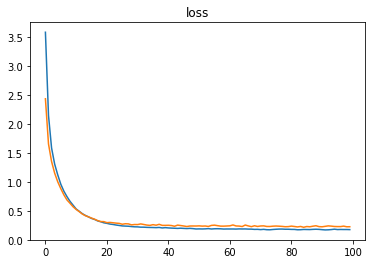

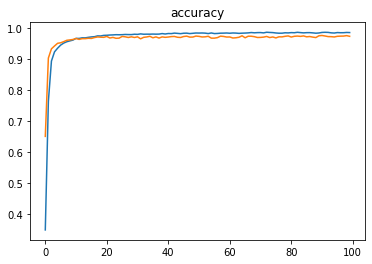

In [15]:
def plot(history, string, epochs):
    plt.plot(np.arange(epochs), history.history[string])
    plt.plot(np.arange(epochs), history.history['val_'+string])
    plt.title(string)
    plt.show()
    
plot(history, 'loss', 100)
plot(history, 'accuracy', 100)

In [16]:
test_set = pd.read_csv('https://raw.githubusercontent.com/vincentjunitio00/Digit-Recognition/master/dataset/test.csv')

In [17]:
print(test_set)

       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
27995       0       0       0       0  ...         0         0         0         0
27996       0       0       0       0  ...         0         0         0         0
27997       0       0       0       0  ...         0         0         0         0
27998       0       0       0       0  ...         0         0         0         0
27999       0       0       0       0  ...         0         0         0         0

[28

In [18]:
test_set_transformed = scaler.transform(test_set)

In [19]:
print(test_set_transformed)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
prediction = model.predict(test_set_transformed)

In [21]:
prediction_num = [np.argmax(predict) for predict in prediction]

In [22]:
print(prediction_num)

[2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1, 5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7, 8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 0, 4, 1, 7, 0, 0, 0, 1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 8, 9, 2, 3, 5, 9, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0, 6, 6, 1, 4, 3, 9, 7, 4, 0, 9, 2, 0, 7, 3, 0, 5, 0, 9, 0, 0, 4, 7, 1, 7, 1, 1, 3, 3, 3, 7, 2, 8, 6, 3, 8, 7, 8, 4, 3, 5, 6, 0, 0, 0, 3, 1, 5, 6, 6, 3, 4, 5, 5, 8, 7, 7, 2, 8, 8, 3, 5, 6, 5, 3, 7, 5, 7, 8, 3, 0, 4, 5, 1, 2, 7, 6, 3, 0, 2, 7, 8, 6, 1, 3, 7, 4, 1, 2, 4, 3, 5, 2, 4, 9, 2, 1, 6, 0, 6, 1, 4, 9, 6, 0, 9, 7, 6, 9, 1, 9, 0, 9, 9, 0, 8, 4, 6, 2, 0, 9, 3, 6, 3, 2, 1, 6, 3, 4, 2, 3, 1, 2, 2, 0, 4, 6, 1, 0, 0, 4, 9, 1, 7, 3, 2, 3, 8, 6, 8, 6, 2, 8, 5, 5, 4, 8, 3, 5, 9, 7, 1, 3, 8, 4, 5, 1, 4, 5, 6, 3, 3, 5, 7, 0, 6, 8, 3, 1, 6, 0, 6, 3, 9, 3, 1, 5, 8, 4, 0, 9, 2, 0, 5, 3, 7, 1, 9, 9, 5, 7, 7, 9, 9, 6, 3, 0, 3, 3, 6, 9, 8, 2, 6, 3, 7, 1, 4, 5, 8, 5, 9, 0, 0, 3, 8, 4, 1, 8, 4, 1, 1, 9, 8, 4, 5, 1, 5, 3, 6, 3, 1, 

In [23]:
submission_nn_regularized = pd.DataFrame({"ImageId": test_set.index + 1, "Label": prediction_num})

In [24]:
submission_nn_regularized.to_csv("Submission_nn_regularized_1.csv", index=False)

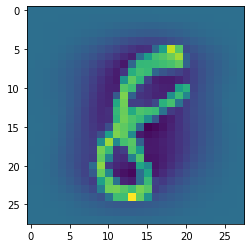

In [25]:
plt.imshow(X_train_set_normalized.reshape(37800, 28, 28)[0])

In [26]:
X_train_set_normalized_reshape = X_train_set_normalized.reshape(37800, 28, 28, 1)

In [27]:
print(X_train_set_normalized_reshape[0].shape)

(28, 28, 1)


In [28]:
X_valid_set_normalized.shape

(4200, 784)

In [29]:
X_valid_set_normalized_reshape = X_valid_set_normalized.reshape(4200, 28, 28, 1)
print(X_valid_set_normalized_reshape.shape)

(4200, 28, 28, 1)


In [30]:
from keras.layers import Flatten, Conv2D, MaxPooling2D

In [31]:
model_reshape = Sequential()
model_reshape.add(Conv2D(64, (3, 3),input_shape=(28, 28, 1), activation='relu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-3)))
model_reshape.add(MaxPooling2D(2, 2))
model_reshape.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model_reshape.add(MaxPooling2D(2, 2))
model_reshape.add(Flatten())
model_reshape.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model_reshape.add(Dropout(0.3))
model_reshape.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model_reshape.add(Dropout(0.3))
model_reshape.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model_reshape.add(Dense(10, activation='softmax'))

model_reshape.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               409856    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)              

In [32]:
model_reshape.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model_reshape.fit(X_train_set_normalized_reshape, y_train_set, epochs=60, steps_per_epoch = 32, validation_data = (X_valid_set_normalized_reshape, y_valid_set), verbose=1)

Epoch 1/60
32/32 [==============================] - 7s 52ms/step - loss: 2.3070 - accuracy: 0.4362 - val_loss: 0.3650 - val_accuracy: 0.9324
Epoch 2/60
32/32 [==============================] - 1s 40ms/step - loss: 0.4098 - accuracy: 0.9136 - val_loss: 0.2310 - val_accuracy: 0.9652
Epoch 3/60
32/32 [==============================] - 1s 40ms/step - loss: 0.2786 - accuracy: 0.9531 - val_loss: 0.1952 - val_accuracy: 0.9755
Epoch 4/60
32/32 [==============================] - 1s 39ms/step - loss: 0.2182 - accuracy: 0.9679 - val_loss: 0.1821 - val_accuracy: 0.9783
Epoch 5/60
32/32 [==============================] - 1s 40ms/step - loss: 0.2003 - accuracy: 0.9730 - val_loss: 0.1669 - val_accuracy: 0.9824
Epoch 6/60
32/32 [==============================] - 1s 40ms/step - loss: 0.1760 - accuracy: 0.9785 - val_loss: 0.1542 - val_accuracy: 0.9829
Epoch 7/60
32/32 [==============================] - 1s 40ms/step - loss: 0.1639 - accuracy: 0.9817 - val_loss: 0.1546 - val_accuracy: 0.9838
Epoch 8/60
32

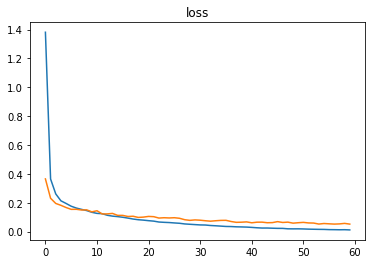

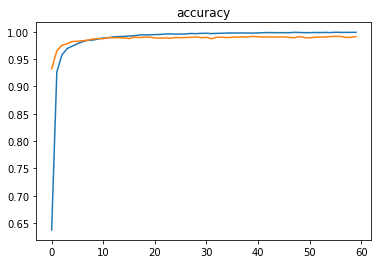

In [33]:
plot(history, 'loss', 60)
plot(history, 'accuracy', 60)

In [34]:
test_set_transformed_reshape = test_set_transformed.reshape(28000, 28, 28, 1)

In [35]:
prediction = model_reshape.predict(test_set_transformed_reshape)
prediction_num = [np.argmax(predict) for predict in prediction]

In [36]:
prediction_num

[2,
 0,
 9,
 9,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 4,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 9,
 9,
 2,
 3,
 5,
 4,
 1,
 0,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 4,
 3,
 9,
 7,
 4,
 0,
 9,
 2,
 0,
 7,
 3,
 0,
 5,
 0,
 8,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 3,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 7,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 3,
 6,
 4,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 3,
 7,
 5,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 2,
 7,
 6,
 3,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 4,
 1,
 2,
 4,
 8,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 3,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 0,
 4,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 3,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 4,
 8,
 3,
 5,


In [37]:
submission_cnn_regularized = pd.DataFrame({"ImageId": test_set.index + 1, "Label": prediction_num})

In [38]:
submission_cnn_regularized.to_csv('submission_cnn_regularized_3.csv', index=False)